# Training

In [2]:
# prompt: remove a folder*

!rm -rf /content/LP_Detection-1


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ot1GdmcHDFR44JKsFzX9")
project = rf.workspace("acksession").project("lp_detection-qfqii")
version = project.version(1)
dataset = version.download("voc")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...


KeyboardInterrupt: 

In [ ]:
# Install Miniconda
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.9.2-Linux-x86_64.sh
!bash ./Miniconda3-py37_4.9.2-Linux-x86_64.sh -b -f -p /usr/local

# Update Conda
!conda update -n base -c defaults conda -y

# Create a Python 3.9 environment
!conda create --name py39_environment python=3.9 -y

# Initialize shell for Conda
!conda init bash

# Activate the environment and check Python version
!source activate py39_environment && python --version

--2024-07-11 18:39:19--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90040905 (86M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.9.2-Linux-x86_64.sh’

Miniconda3-py37_4.9 100%[===================>]  85.87M   271MB/s    in 0.3s    

2024-07-11 18:39:20 (271 MB/s) - ‘Miniconda3-py37_4.9.2-Linux-x86_64.sh’ saved [90040905/90040905]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2020.10.14=0
    - certifi==2020.6.20=pyhd3eb1b0_3
    - cffi==1.14.3=py37h261ae71_2
    - chardet==3.0.4=py37h06a4308_1003
    - co

In [ ]:
!pip install tflite_model_maker
# !pip install -q pycocotools
# !pip install opencv-python-headless
# !pip uninstall -y tensorflow && pip install -q tensorflow==2.8.0
# !pip install ipykernel
# !pip install --upgrade numba llvmlite


In [ ]:
!source activate py39_environment && python --version
!source /usr/local/etc/profile.d/conda.sh && conda activate py39_environment && pip install tflite_model_maker
!source /usr/local/etc/profile.d/conda.sh && conda activate py39_environment && pip install -q pycocotools
!source /usr/local/etc/profile.d/conda.sh && conda activate py39_environment && pip install opencv-python-headless
!source /usr/local/etc/profile.d/conda.sh && conda activate py39_environment && pip uninstall -y tensorflow && pip install -q tensorflow==2.8.0
!source /usr/local/etc/profile.d/conda.sh && conda activate py39_environment && pip install ipykernel
!source /usr/local/etc/profile.d/conda.sh && conda activate py39_environment && pip install --upgrade numba llvmlite


Python 3.9.19
  Using cached tensorflow-2.17.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached tensorflow-2.8.4-cp39-cp39-manylinux2010_x86_64.whl.metadata (2.9 kB)
Using cached tensorflow-2.8.4-cp39-cp39-manylinux2010_x86_64.whl (498.1 MB)
Found existing installation: tensorflow 2.8.4
Uninstalling tensorflow-2.8.4:
  Successfully uninstalled tensorflow-2.8.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 20.4 MB/s eta 0:00:00


In [ ]:
# organize the dataset into dataset folder:
!mkdir -p dataset/images
!mkdir -p dataset/annotations

!mv /content/LP_Detection-1/test/*.xml dataset/annotations/
!mv /content/LP_Detection-1/test/*.jpg dataset/images/

!mv /content/LP_Detection-1/test/*.xml dataset/annotations/
!mv /content/LP_Detection-1/test/*.jpg dataset/images/

!mv /content/LP_Detection-1/valid/*.xml dataset/annotations/
!mv /content/LP_Detection-1/valid/*.jpg dataset/images/
!rm -r /content/LP_Detection-1/test
!rm -r /content/LP_Detection-1/train
!rm -r /content/LP_Detection-1/valid

mv: cannot stat '/content/LP_Detection-1/test/*.xml': No such file or directory
mv: cannot stat '/content/LP_Detection-1/test/*.jpg': No such file or directory


In [ ]:
%%writefile my_script.py
import numpy as np
import os

np.object = object
np.bool = bool
np.complex = complex

from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

use_custom_dataset = True
dataset_is_split = False

if use_custom_dataset:

  # The ZIP file you uploaded:
  #!unzip dataset.zip

  # Your labels map as a dictionary (zero is reserved):
  label_map = {1:"Background",2: 'English_plate', 3:"Iraq_plate"}
  print(label_map)

  if dataset_is_split:
    # If your dataset is already split, specify each path:
    train_images_dir = 'dataset/train/images'
    train_annotations_dir = 'dataset/train/annotations'
    val_images_dir = 'dataset/validation/images'
    val_annotations_dir = 'dataset/validation/annotations'
    test_images_dir = 'dataset/test/images'
    test_annotations_dir = 'dataset/test/annotations'
  else:
    # If it's NOT split yet, specify the path to all images and annotations
    images_in = 'dataset/images'
    annotations_in = 'dataset/annotations'

import os
import random
import shutil

def split_dataset(images_path, annotations_path, val_split, test_split, out_path):
  """Splits a directory of sorted images/annotations into training, validation, and test sets.

  Args:
    images_path: Path to the directory with your images (JPGs).
    annotations_path: Path to a directory with your VOC XML annotation files,
      with filenames corresponding to image filenames. This may be the same path
      used for images_path.
    val_split: Fraction of data to reserve for validation (float between 0 and 1).
    test_split: Fraction of data to reserve for test (float between 0 and 1).
  Returns:
    The paths for the split images/annotations (train_dir, val_dir, test_dir)
  """
  _, dirs, _ = next(os.walk(images_path))

  train_dir = os.path.join(out_path, 'train')
  val_dir = os.path.join(out_path, 'validation')
  test_dir = os.path.join(out_path, 'test')

  IMAGES_TRAIN_DIR = os.path.join(train_dir, 'images')
  IMAGES_VAL_DIR = os.path.join(val_dir, 'images')
  IMAGES_TEST_DIR = os.path.join(test_dir, 'images')
  os.makedirs(IMAGES_TRAIN_DIR, exist_ok=True)
  os.makedirs(IMAGES_VAL_DIR, exist_ok=True)
  os.makedirs(IMAGES_TEST_DIR, exist_ok=True)

  ANNOT_TRAIN_DIR = os.path.join(train_dir, 'annotations')
  ANNOT_VAL_DIR = os.path.join(val_dir, 'annotations')
  ANNOT_TEST_DIR = os.path.join(test_dir, 'annotations')
  os.makedirs(ANNOT_TRAIN_DIR, exist_ok=True)
  os.makedirs(ANNOT_VAL_DIR, exist_ok=True)
  os.makedirs(ANNOT_TEST_DIR, exist_ok=True)

  # Get all filenames for this dir, filtered by filetype
  filenames = os.listdir(os.path.join(images_path))
  filenames = [os.path.join(images_path, f) for f in filenames if (f.endswith('.jpg'))]
  # Shuffle the files, deterministically
  filenames.sort()
  random.seed(42)
  random.shuffle(filenames)
  # Get exact number of images for validation and test; the rest is for training
  val_count = int(len(filenames) * val_split)
  test_count = int(len(filenames) * test_split)
  for i, file in enumerate(filenames):
    source_dir, filename = os.path.split(file)
    annot_file = os.path.join(annotations_path, filename.replace(".jpg", ".xml"))
    if i < val_count:
      shutil.copy(file, IMAGES_VAL_DIR)
      shutil.copy(annot_file, ANNOT_VAL_DIR)
    elif i < val_count + test_count:
      shutil.copy(file, IMAGES_TEST_DIR)
      shutil.copy(annot_file, ANNOT_TEST_DIR)
    else:
      shutil.copy(file, IMAGES_TRAIN_DIR)
      shutil.copy(annot_file, ANNOT_TRAIN_DIR)
  return (train_dir, val_dir, test_dir)

# We need to instantiate a separate DataLoader for each split dataset
if use_custom_dataset:
  if dataset_is_split:
    train_data = object_detector.DataLoader.from_pascal_voc(
        train_images_dir, train_annotations_dir, label_map=label_map)
    validation_data = object_detector.DataLoader.from_pascal_voc(
        val_images_dir, val_annotations_dir, label_map=label_map)
    test_data = object_detector.DataLoader.from_pascal_voc(
        test_images_dir, test_annotations_dir, label_map=label_map)
  else:
    train_dir, val_dir, test_dir = split_dataset(images_in, annotations_in,
                                                 val_split=0.2, test_split=0.2,
                                                 out_path='split-dataset')
    train_data = object_detector.DataLoader.from_pascal_voc(
        os.path.join(train_dir, 'images'),
        os.path.join(train_dir, 'annotations'), label_map=label_map)
    validation_data = object_detector.DataLoader.from_pascal_voc(
        os.path.join(val_dir, 'images'),
        os.path.join(val_dir, 'annotations'), label_map=label_map)
    test_data = object_detector.DataLoader.from_pascal_voc(
        os.path.join(test_dir, 'images'),
        os.path.join(test_dir, 'annotations'), label_map=label_map)

  print(f'train count: {len(train_data)}')
  print(f'validation count: {len(validation_data)}')
  print(f'test count: {len(test_data)}')


spec = model_spec.get('efficientdet_lite2')

model = object_detector.create(train_data=train_data,
                               model_spec=spec,
                               validation_data=validation_data,
                               epochs=5,
                               batch_size=10,
                               train_whole_model=True)

TFLITE_FILENAME = 'model-effi_02-v4.tflite'
LABELS_FILENAME = 'labels.txt'

model.export(export_dir='.', tflite_filename=TFLITE_FILENAME, label_filename=LABELS_FILENAME,
             export_format=[ExportFormat.TFLITE, ExportFormat.LABEL,ExportFormat.SAVED_MODEL])

model.evaluate(test_data)

model.evaluate_tflite(TFLITE_FILENAME, test_data)








Writing my_script.py


In [ ]:
# prompt: get nb of file in folfder

import os

# Get the current working directory
cwd = os.getcwd()

# Get all files in the current working directory
files = os.listdir("/content/dataset/images")

# Count the number of files
num_files = len(files)

# Print the number of files
print(f"There are {num_files} files in the current working directory.")


There are 7145 files in the current working directory.


In [ ]:
!source /usr/local/etc/profile.d/conda.sh && conda activate py39_environment && python my_script.py


2024-07-11 19:02:03.063765: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-07-11 19:02:03.063806: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/local/envs/py39_environment/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/ten

# Testing


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ot1GdmcHDFR44JKsFzX9")
project = rf.workspace("acksession").project("lp_detection-qfqii")
version = project.version(1)
dataset = version.download("coco")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to LP_Detection-1 in coco:: 100%|██████████| 7153/7153 [00:02<00:00, 2394.67it/s]


In [2]:
# prompt: unzip a folder

!unzip -j /content/Efficientdet.zip -d /content/saved_model


Archive:  /content/Efficientdet.zip
  inflating: /content/saved_model/variables.index  
  inflating: /content/saved_model/variables.data-00000-of-00001  
  inflating: /content/saved_model/saved_model.pb  


In [4]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the TensorFlow SavedModel
model_path = "/content/saved_model"  # Path to the directory containing saved_model.pb
model = tf.saved_model.load(model_path)
infer = model.signatures['serving_default']

# Tensor names based on the provided information
input_tensor_name = 'images'
output_boxes_tensor_name = 'output_0'
output_classes_tensor_name = 'output_3'
output_scores_tensor_name = 'output_2'
output_num_detections_tensor_name = 'output_1'
# Load labels
def load_labels(filename):
    with open(filename, 'r') as f:
        return [line.strip() for line in f.readlines()]

labels = load_labels("/content/labels.txt")  # Path to your labels file

In [5]:
print("Input Signature:")
for name, tensor_info in infer.structured_input_signature[1].items():
    print(f"Input tensor name: {name}, shape: {tensor_info.shape}, dtype: {tensor_info.dtype}")

print("\nOutput Signature:")
for name, tensor_info in infer.structured_outputs.items():
    print(f"Output tensor name: {name}, shape: {tensor_info.shape}, dtype: {tensor_info.dtype}")


Input Signature:
Input tensor name: images, shape: (None, None, None, 3), dtype: <dtype: 'uint8'>

Output Signature:
Output tensor name: output_0, shape: (None, 100, 4), dtype: <dtype: 'float32'>
Output tensor name: output_3, shape: (None,), dtype: <dtype: 'int32'>
Output tensor name: output_2, shape: (None, 100), dtype: <dtype: 'float32'>
Output tensor name: output_1, shape: (None, 100), dtype: <dtype: 'float32'>


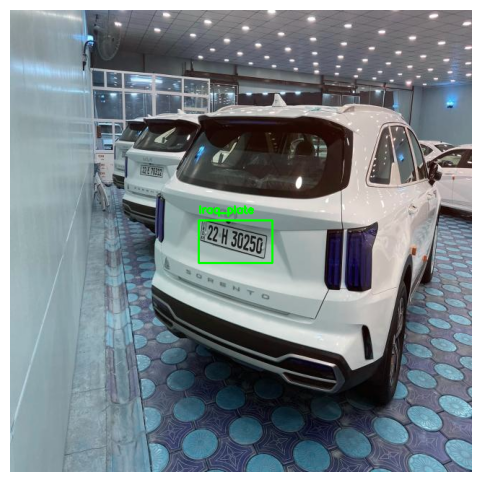

In [12]:
def inference(image_path):
  input_image = cv2.imread(image_path)  # Path to your image
  input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

  # Convert to tensor and normalize
  input_data = np.expand_dims(input_image, axis=0).astype(np.uint8)

  # Run inference
  output = infer(tf.constant(input_data))
  # Get output tensor names and process the output
  output_boxes = output["output_0"].numpy()
  output_classes = output["output_2"].numpy()
  output_scores = output["output_1"].numpy()


  # Interpret the model output
  predicted_boxes = output_boxes[0]  # Assuming the first batch item
  predicted_scores = output_scores[0]  # Assuming the first detection

  # Check if output_classes is an array or a scalar
  predicted_class_indices = output_classes[0]


  # Get the index of the highest score
  list_ouputs=[]
  for i in range(len(predicted_scores)):
    if predicted_scores[i] > 0.25:
      list_ouputs.append(i)
  highest_predicted_scores = [predicted_scores[i] for i in list_ouputs]
  highest_score_boxes= [predicted_boxes[i] for i in list_ouputs]
  highest_score_class_indexes = [predicted_class_indices[i] for i in list_ouputs]  # Ensure index is an integer

  # Check if the index is within the range of labels

  highest_score_labels = [ labels[int(i)-1] for i in highest_score_class_indexes]
  return highest_score_boxes,highest_predicted_scores,highest_score_labels

# Draw the bounding box with the highest score on the image
boxes,scores,lables=inference("/content/70-13-_jpg.rf.fa2aea14b2828cc01a9b67c6c3cea43a.jpg")
input_image = cv2.imread("/content/70-13-_jpg.rf.fa2aea14b2828cc01a9b67c6c3cea43a.jpg")
for highest_score_box,label in zip(boxes,lables):
  ymin, xmin, ymax, xmax = highest_score_box
  xmin = int(xmin)
  ymin = int(ymin)
  xmax = int(xmax)
  ymax = int(ymax)
  cv2.rectangle(input_image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
  text = label
  cv2.putText(input_image, text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
# Display the image using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(input_image)
plt.axis('off')

plt.show()

In [7]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import os
import json
label_map = {
    1: "Background",
    2: "English_plate",
    3: "Iraq_plate"
}

def evaluate_on_dataset(images_dir, annotations_file, infer_func):
    coco = COCO(annotations_file)
    image_ids = coco.getImgIds()
    results = []

    for image_id in image_ids :
        if(image_id%100==0):
          print(image_id)
        image_info = coco.loadImgs(image_id)[0]
        image_path = os.path.join(images_dir, image_info['file_name'])

        highest_score_boxes, highest_predicted_scores, highest_score_labels = inference(image_path)

        for bbox, score, label in zip(highest_score_boxes, highest_predicted_scores, highest_score_labels):
            ymin, xmin, ymax, xmax = bbox
            width = xmax - xmin
            height = ymax - ymin
            category_id = [k for k, v in label_map.items() if v == label][0]
            result = {
                'image_id': int(image_id),
                'category_id': int(category_id),
                'bbox': [float(xmin), float(ymin), float(width), float(height)],
                'score': float(score)
            }
            results.append(result)


    # Save results to a file
    with open('coco_predictions.json', 'w') as f:
        json.dump(results, f)

    # Evaluate using COCO API
    coco_dt = coco.loadRes('coco_predictions.json')
    coco_eval = COCOeval(coco, coco_dt, 'bbox')
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

# Assuming the dataset is in the following directories
images_dir = '/content/LP_Detection-1/valid'
annotations_file = '/content/LP_Detection-1/valid/_annotations.coco.json'

# Run evaluation
evaluate_on_dataset(images_dir, annotations_file, inference)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
0
100
200
300
400
500
600
700
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.29s).
Accumulating evaluation results...
DONE (t=0.09s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.381
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.626
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.420
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.064
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.406
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.377
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.494
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.496
 Average Recall     (AR) @[ IoU=0.5

In [ ]:
# prompt: saved a folder to google drive from google colab runtime

!zip -r Efficientdet.zip /content/saved_model


  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/variables/ (stored 0%)
  adding: content/saved_model/variables/variables.index (deflated 85%)
  adding: content/saved_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/saved_model/saved_model.pb (deflated 91%)
  adding: content/saved_model/assets/ (stored 0%)


# Quantization

In [ ]:
%%shell

NUMBER_OF_TPUS=1
TFLITE_FILENAME='model-effi_02-v4.tflite'

edgetpu_compiler $TFLITE_FILENAME -d --num_segments=$NUMBER_OF_TPUS


Edge TPU Compiler version 16.0.384591198
Searching for valid delegate with step 1
Try to compile segment with 357 ops
Started a compilation timeout timer of 180 seconds.

Model compiled successfully in 15733 ms.

Input model: model-effi_02-v4.tflite
Input size: 7.05MiB
Output model: model-effi_02-v4_edgetpu.tflite
Output size: 9.74MiB
On-chip memory used for caching model parameters: 7.14MiB
On-chip memory remaining for caching model parameters: 1.25KiB
Off-chip memory used for streaming uncached model parameters: 228.88KiB
Number of Edge TPU subgraphs: 1
Total number of operations: 357
Operation log: model-effi_02-v4_edgetpu.log

Model successfully compiled but not all operations are supported by the Edge TPU. A percentage of the model will instead run on the CPU, which is slower. If possible, consider updating your model to use only operations supported by the Edge TPU. For details, visit g.co/coral/model-reqs.
Number of operations that will run on Edge TPU: 354
Number of operations 

In [ ]:
!source /usr/local/etc/profile.d/conda.sh && conda activate py39_environment && pip install tflite_runtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.4 MB/s eta 0:00:00


In [ ]:
%%shell
python

Python 3.7.9 (default, Aug 31 2020, 12:42:55) 
[GCC 7.3.0] :: Anaconda, Inc. on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> from tflite_runtime.interpreter import Interpreter
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'tflite_runtime'
>>> pip install  tflite_runtime
  File "<stdin>", line 1
    pip install  tflite_runtime
              ^
SyntaxError: invalid syntax
>>> pip install tflite_runtime
  File "<stdin>", line 1
    pip install tflite_runtime
              ^
SyntaxError: invalid syntax
>>> from tflite_runtime.interpreter import Interpreter
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'tflite_runtime'
>>> 

KeyboardInterrupt
>>> exit
Use exit() or Ctrl-D (i.e. EOF) to exit
>>> exit()


In [ ]:
TFLITE_FILENAME = 'model-effi_02-v4.tflite'
from tflite_runtime.interpreter import Interpreter
# Load the TFLite model
interpreter = Interpreter(model_path=TFLITE_FILENAME)
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


ModuleNotFoundError: No module named 'tflite_runtime'

In [ ]:
! curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -

! echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list

! sudo apt-get update

! sudo apt-get install edgetpu-compiler

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2659  100  2659    0     0  33912      0 --:--:-- --:--:-- --:--:-- 34089
OK
deb https://packages.cloud.google.com/apt coral-edgetpu-stable main
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://packages.cloud.google.com/apt coral-edgetpu-stable InRelease [1,423 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [55.6 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [973 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://packages.cloud.google.com/apt coral-edgetpu-stable/main amd64 Packages [6,888 B]
Get:8 https://packages.cloud.google.com/apt coral-edgetpu-stable/ma